In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset
data = pd.read_csv("Startups.csv")

In [11]:
# Select the specified columns for classification
selected_columns = ["Company", "Valuation", "Industry", "Country"]
data = data[selected_columns]

In [16]:
# Define Valuation categories
# We use three categories here: Low, Medium, and High
def categorize_valuation(valuation):
    if valuation < 5000000:
        return "Low"
    elif 5000000 <= valuation < 10000000:
        return "Medium"
    else:
        return "High"

data["Valuation"] = data["Valuation"].apply(categorize_valuation)

In [17]:
# Encode categorical variables (e.g., Industry and Country)
label_encoder = LabelEncoder()
data["Industry"] = label_encoder.fit_transform(data["Industry"])
data["Country"] = label_encoder.fit_transform(data["Country"])
data["Valuation"] = label_encoder.fit_transform(data["Valuation"])  # Encode the target variable

In [18]:
# Split data into features (X) and target variable (Valuation)
X = data[["Industry", "Country"]]
y = data["Valuation"]

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create the k-NN classifier (you can specify the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
# Train the classifier on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [23]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

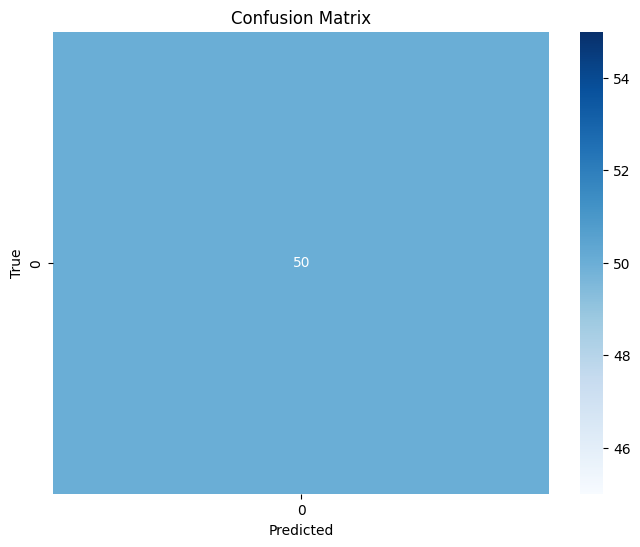

In [24]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

In [26]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [ ]:
"""
The accuracy is very high, i.e., 100%. Factors that contribute to a high accuracy score are 
Simplistic categories
Small dataset
Choice of k
Feature selection - industry & countrym ay not capture all the relevant information for predicting valuation.
"""

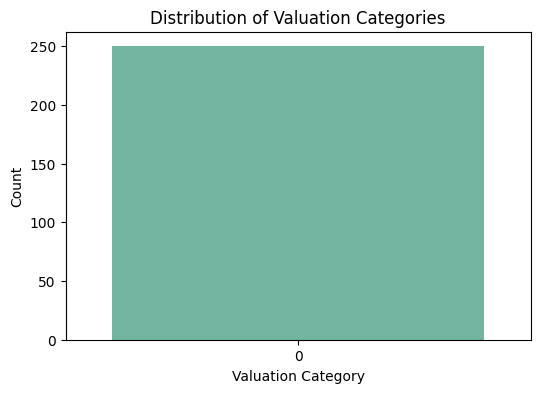

In [27]:
# Plot a bar graph for the distribution of Valuation categories
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Valuation", palette="Set2")
plt.xlabel("Valuation Category")
plt.ylabel("Count")
plt.title("Distribution of Valuation Categories")
plt.show()